In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


caffe_root = '~/caffe/' 
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


DEMO_DIR = './DemoDir'

categories = [ 'Angry' , 'Disgust' , 'Fear' , 'Happy'  , 'Neutral' ,  'Sad' , 'Surprise']

In [2]:
def showimage(im):
    if im.ndim == 3:
        im = im[:, :, ::-1]
    plt.set_cmap('jet')
    plt.imshow(im,vmin=0, vmax=0.2)
    

def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    showimage(data)

In [ ]:
cur_net_dir = 'VGG_S_rgb'
images_repo = './cohn-kanade-images/S005/001'

mean_filename=os.path.join(DEMO_DIR,cur_net_dir,'mean.binaryproto')
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

net_pretrained = os.path.join(DEMO_DIR,cur_net_dir,'EmotiW_VGG_S.caffemodel')
net_model_file = os.path.join(DEMO_DIR,cur_net_dir,'deploy.prototxt')
VGG_S_Net = caffe.Classifier(net_model_file, net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

input_image = caffe.io.load_image(os.path.join(images_repo,'S005_001_00000011.png'))
prediction = VGG_S_Net.predict([input_image],oversample=False)
print 'predicted category is {0}'.format(categories[prediction.argmax()])

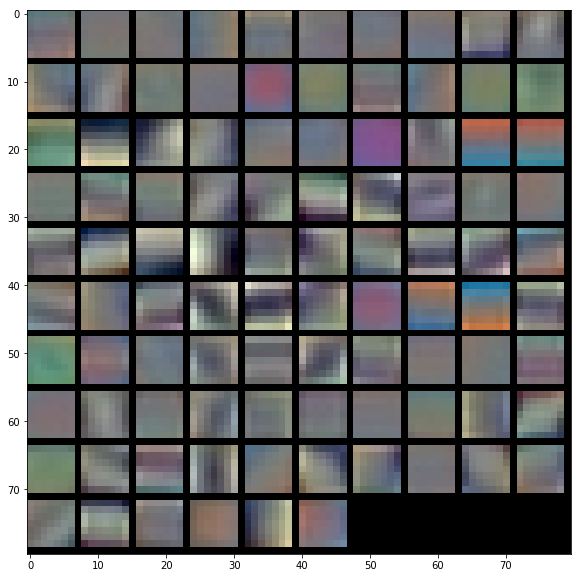

In [7]:
filters = VGG_S_Net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

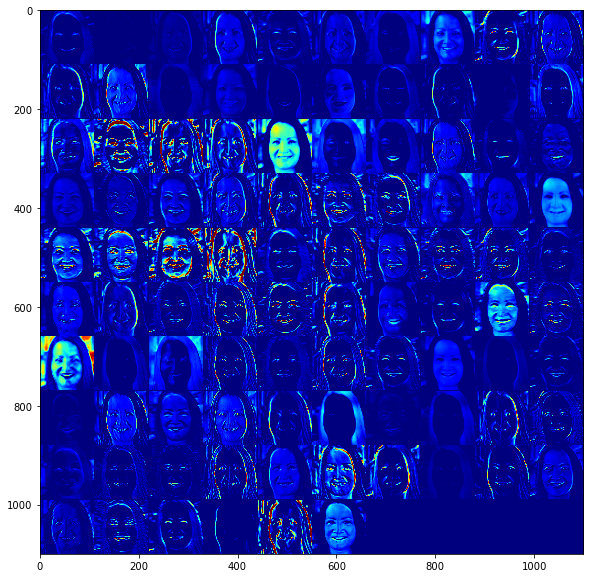

In [8]:
feat = VGG_S_Net.blobs['conv1'].data[0]
vis_square(feat)